In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
from sys import path, platform
import os

root_dir = os.path.abspath('../')
## Add model_functions to system path
path.append(root_dir)

from utils import load_data, plotting
from models import RescorlaWagner, Biased, Heuristic, RWRL, RWDecay

## Load data

In [7]:
path_to_summary = f'{root_dir}/sample_data/clean_df_summary.csv'
path_to_longform = f'{root_dir}/sample_data/clean_df_longform.csv'
df_summary, longform = load_data.load_clean_dbs(path_to_summary, path_to_longform)
netcdf_path = f'{root_dir}/decision_output/'
# df_summary

In [5]:
df_summary = df_summary[
    (df_summary['Money Accuracy']>0.4) & 
    (df_summary['Other Accuracy']>0.4)]
df_summary.shape

(10, 10)

In [6]:
longform = longform[(longform['pid_db'].isin(df_summary['id'])) & (longform['Type']!='practice')]
longform

,PID,id,Block,Type,Trial,Cue Time,Action,Action Time,Reward,Reward Time,RT,Spin Speed,Craving Rating,Mood Rating,pid_db
5,61281debe85082cc937dd9ae,6,1,other,1,1.647963e+09,1,1.647963e+09,1,1.647963e+09,0.972,fast,-1.0,-1.0,1
6,61281debe85082cc937dd9ae,7,1,other,2,1.647963e+09,1,1.647963e+09,0,1.647963e+09,0.045,fast,35.0,-1.0,1
7,61281debe85082cc937dd9ae,8,1,other,3,1.647963e+09,0,1.647963e+09,1,1.647963e+09,0.718,slow,-1.0,-1.0,1
8,61281debe85082cc937dd9ae,9,1,other,4,1.647963e+09,0,1.647963e+09,0,1.647963e+09,0.030,slow,-1.0,-1.0,1
9,61281debe85082cc937dd9ae,10,1,other,5,1.647963e+09,0,1.647963e+09,0,1.647963e+09,0.500,fast,34.0,18.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1245,60b78db6151a3abb7f832c22,1410,2,other,56,1.647970e+09,1,1.647970e+09,1,1.647970e+09,0.867,slow,-1.0,-1.0,10
1246,60b78db6151a3abb7f832c22,1413,2,other,57,1.647970e+09,1,1.647970e+09,1,1.647970e+09,1.235,slow,-1.0,-1.0,10
1247,60b78db6151a3abb7f832c22,1417,2,other,58,1.647970e+09,1,1.647970e+09,0,1.647970e+09,3.635,fast,-1.0,-1.0,10
1248,60b78db6151a3abb7f832c22,1420,2,other,59,1.647970e+09,0,1.647970e+09,1,1.647970e+09,0.584,fast,-1.0,-1.0,10


## Choose a subject

In [112]:
pid_num = 2
pid = list(df_summary['PID'].unique())[pid_num-1]

## Decision modeling

### Run Biased model

In [11]:
biased_model = Biased.Biased(model_name='biased', save_path=netcdf_path, summary=df_summary, longform=longform)
biased_model.calc_decision_model(jupyter=True)
biased_model.calc_Q_table()
biased_model.calc_ics()

'Done! Skipped []'

Participant 60b78db6151a3abb7f832c22, money block completed...
Participant 60b78db6151a3abb7f832c22, other block completed...
No Q values available for this model.


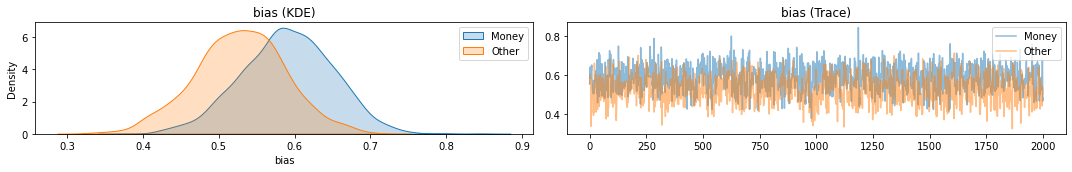

In [113]:
plotting.trace_plot(biased_model, pid);

### Run Heuristic model

In [94]:
heu_model = Heuristic.Heuristic(model_name='heuristic', save_path=netcdf_path, summary=df_summary, longform=longform)
heu_model.calc_decision_model(jupyter=True)
heu_model.calc_Q_table()
heu_model.calc_ics()

'Done! Skipped []'

Participant 60b78db6151a3abb7f832c22, money block completed...
Participant 60b78db6151a3abb7f832c22, other block completed...
No Q values available for this model.


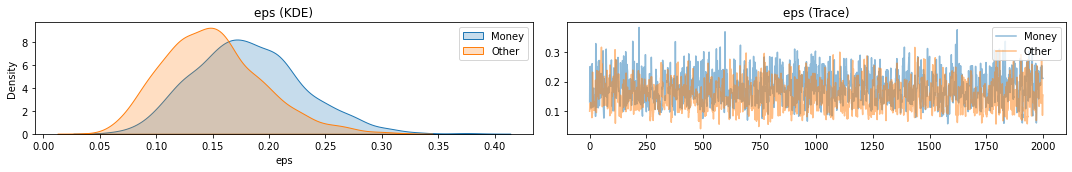

In [114]:
plotting.trace_plot(heu_model, pid);

### Run Rescorla-Wagner model

In [50]:
rw_model = RescorlaWagner.RW(model_name='rw', save_path=netcdf_path, summary=df_summary, longform=longform)
rw_model.calc_decision_model(jupyter=True)
rw_model.calc_Q_table()
rw_model.calc_ics()

'Done! Skipped []'

Participant 60b78db6151a3abb7f832c22, money block completed...
Participant 60b78db6151a3abb7f832c22, other block completed...
Q table not calculated, running now


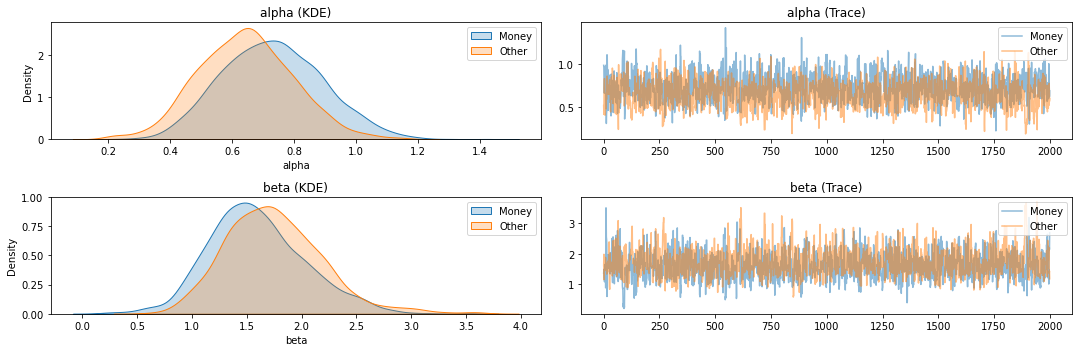

In [115]:
plotting.trace_plot(rw_model, pid);

### Run RW model with decay

In [54]:
rwdecay_model = RWDecay.RWDecay(model_name='rwdecay', save_path=netcdf_path, summary=df_summary, longform=longform)
rwdecay_model.calc_decision_model(jupyter=True)
rwdecay_model.calc_Q_table()
rwdecay_model.calc_ics()

'Done! Skipped []'

Participant 60b78db6151a3abb7f832c22, money block completed...
Participant 60b78db6151a3abb7f832c22, other block completed...


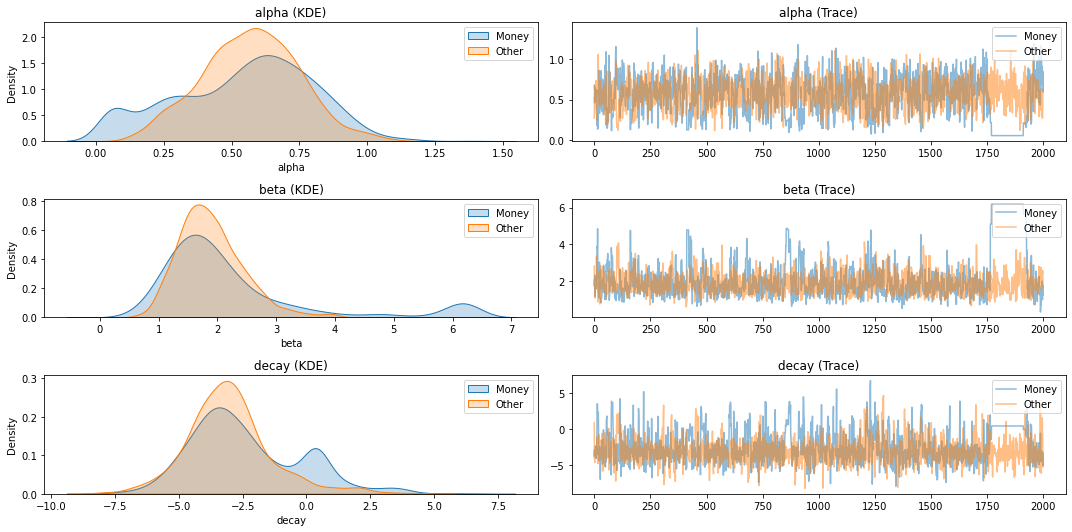

In [116]:
plotting.trace_plot(rwdecay_model, pid);

### Run RW model with separate learning rates for +/- PEs

In [66]:
rwrl_model = RWRL.RWRL(model_name='rwrl', save_path=netcdf_path, summary=df_summary, longform=longform)
rwrl_model.calc_decision_model(jupyter=True)
rwrl_model.calc_Q_table()
rwrl_model.calc_ics()

'Done! Skipped []'

Participant 60b78db6151a3abb7f832c22, money block completed...
Participant 60b78db6151a3abb7f832c22, other block completed...


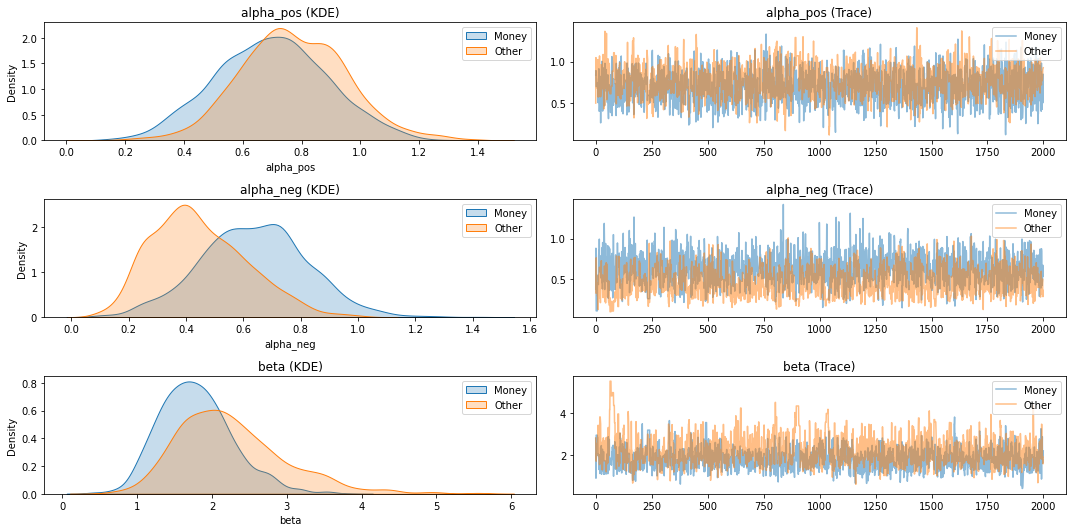

In [117]:
plotting.trace_plot(rwrl_model, pid);

## Subject-level visualization

### Values visualized

PID: 58595b56a3149800011e156e


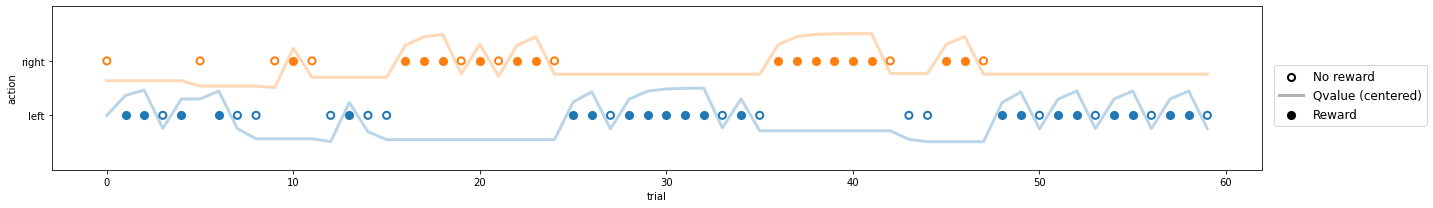

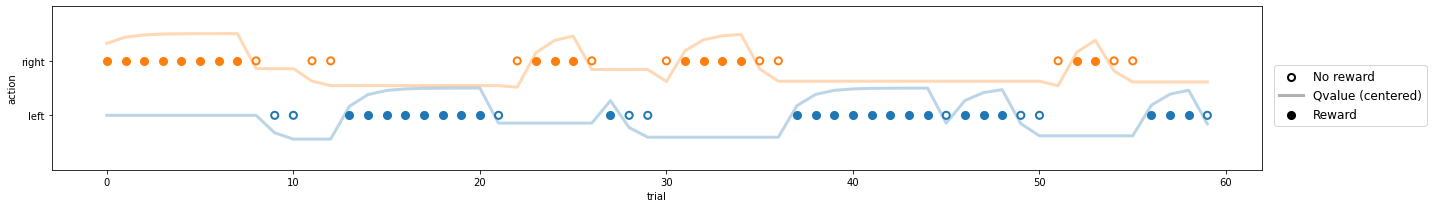

In [118]:
print(f'PID: {pid}')

plotting.plot_data(model=rw_model, block_type='money', pid=pid)
plotting.plot_data(model=rw_model, block_type='other', pid=pid)